# Face Detector (work in progress)
### Testing face detector using "face_angles.jpg"

In [13]:
# getting image path
# try with flowers.jpg as well (doesn't have any faces)
from pathlib import Path
current = %pwd
path = Path(current)
imagePath = str(path.parent.absolute())
image_name = "face_angles.jpg"
imagePath += '\\' + image_name
imagePath


'c:\\Users\\brian\\Desktop\\PYUM\\P-YUM\\face_angles.jpg'

In [14]:
cascPath = "haarcascade_frontalface_default.xml"
cascPath_m = "haarcascade_mouth.xml"
cascPath_e = "haarcascade_eye.xml"


In [15]:
import cv2


In [16]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)
mouthCascade = cv2.CascadeClassifier(cascPath_m)
eyeCascade = cv2.CascadeClassifier(cascPath_e)

# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE
)

mouths = mouthCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE
)

eyes = eyeCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE
)


In [17]:
print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

print("Found {0} mouths!".format(len(mouths)))

# Draw a rectangle around the mouths
for (x, y, w, h) in mouths:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

print("Found {0} eyes!".format(len(eyes)))

# Draw a rectangle around the eyes
for (x, y, w, h) in eyes:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)


Found 9 faces!
Found 22 mouths!
Found 13 eyes!


In [18]:
# input two rectangles
def temp_contains(R1, R2):

    # recalculating the sides from (x1, y1, width, height)
    # to (x1, y1, x2, y2)
    R1X2 = R1[0] + R1[2]
    R1Y2 = R1[1] + R1[3]
    R2X2 = R2[0] + R2[2]
    R2Y2 = R2[1] + R2[3]

    new_x1 = min(R1[0], R2[0])
    new_x2 = max(R1X2, R2X2) - new_x1  # width
    new_y1 = min(R1[1], R2[1])
    new_y2 = max(R1Y2, R2Y2) - new_y1  # height

    New_rect = [new_x1, new_y1, new_x2, new_y2]

    if (R1[0] >= R2X2) or (R1X2 <= R2[0]) or (R1Y2 <= R2[1]) or (R1[1] >= R2Y2):
        # not valid. not contained!
        return False, []
    else:
        # valid. contains
        return True, New_rect


In [19]:
for face in faces:
    for mouth in mouths:
        Valid, mesh_rect = temp_contains(face, mouth)
        if Valid:
            for eye in eyes:
                second_Valid, new_mesh_rect = temp_contains(mesh_rect, eye)
                if second_Valid:
                    x = new_mesh_rect[0]
                    y = new_mesh_rect[1]
                    w = new_mesh_rect[2]
                    h = new_mesh_rect[3]
                    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 2)


In [20]:
# runs reasonably well
# notice how it doesn't really work on faces that are turned 90 degrees.

cv2.imshow("Features found", image)
cv2.waitKey(0)


-1

# Face As A Percentage of the Video

In [9]:
# first, get the path of the video in question
# getting video path
from pathlib import Path
current = %pwd
path = Path(current)
filename = str(path.parent.absolute())
video_name = "American Grilled Cheese Vs. French Grilled Cheese.mp4"
# video_name = "Binging with Babish_ Patrick's Briefcase from SpongeBob SquarePants.mp4"
filename += '\\' + video_name
filename


'c:\\Users\\brian\\Desktop\\PYUM\\P-YUM\\American Grilled Cheese Vs. French Grilled Cheese.mp4'

In [10]:
import cv2
import numpy as np


In [11]:
# input two rectangles
def contains(R1, R2):

    # recalculating the sides from (x1, y1, width, height)
    # to (x1, y1, x2, y2)
    R1X2 = R1[0] + R1[2]
    R1Y2 = R1[1] + R1[3]
    R2X2 = R2[0] + R2[2]
    R2Y2 = R2[1] + R2[3]

    new_x1 = min(R1[0], R2[0])
    new_x2 = max(R1X2, R2X2) - new_x1  # width
    new_y1 = min(R1[1], R2[1])
    new_y2 = max(R1Y2, R2Y2) - new_y1  # height

    New_rect = [new_x1, new_y1, new_x2, new_y2]

    if (R1[0] >= R2X2) or (R1X2 <= R2[0]) or (R1Y2 <= R2[1]) or (R1[1] >= R2Y2):
        # not valid. not contained!
        return False, []
    else:
        # valid. contains
        return True, New_rect


In [12]:
def face_detector(image):

    max_pixels = 0
    return_me = False

    cascPath = "haarcascade_frontalface_default.xml"
    cascPath_m = "haarcascade_mouth.xml"
    cascPath_e = "haarcascade_eye.xml"

    faceCascade = cv2.CascadeClassifier(cascPath)
    mouthCascade = cv2.CascadeClassifier(cascPath_m)
    eyeCascade = cv2.CascadeClassifier(cascPath_e)

    # Read the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    mouths = mouthCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    eyes = eyeCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # yuck. if you can make this faster, go ahead
    # makes sure the face, mouth, and eye rectangles contain each other.
    # This ensures a face
    for face in faces:
        for mouth in mouths:
            Valid, mesh_rect = contains(face, mouth)
            if Valid:
                for eye in eyes:
                    second_Valid, new_mesh_rect = contains(mesh_rect, eye)

                    if second_Valid:
                        return_me = True
                        width = new_mesh_rect[2]
                        height = new_mesh_rect[3]
                        if width * height > max_pixels:
                            max_pixels = width * height
                        # cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 2)

    return return_me, max_pixels * 100 / (image.shape[0] * image.shape[1])


In [13]:
# input: the video file
# output: length of video file in seconds

def find_video_length(video):

    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)

    return frame_count / fps, fps


In [14]:
def face_percentage(filename):

    face_by_seconds = []
    face_size_of_screen = []

    # person_counter counts number of frames person was in shot
    person_counter = 0
    # no_person_counter counts number of frames where person is not in shot
    no_person_counter = 0

    my_video = cv2.VideoCapture(filename)
    if (my_video.isOpened() == False):
        print("Error opening video stream or file")

    _, video_fps = find_video_length(my_video)

    nth_frame = video_fps // 2
    frame_counter = 0

    while (my_video.isOpened()):

        ret, frame = my_video.read()
        if frame_counter % nth_frame == 0:

            # Capture frame-by-frame
            if ret == True:
                has_face, percentage = face_detector(frame)
                if has_face:
                    face_by_seconds.append(frame_counter / video_fps)
                    face_size_of_screen.append(percentage)
                    person_counter += 1
                else:
                    no_person_counter += 1
            else:
                break

        if ret == False:
            break

        frame_counter += 1

    percentage_of_face_in_video = (
        person_counter * 100) / (no_person_counter + person_counter)

    return percentage_of_face_in_video, face_by_seconds, face_size_of_screen


In [15]:
face_percentage, face_time, face_size = face_percentage(filename)


In [24]:
face_time[-1] // 10 + 1


31.0

In [27]:
a = [0] * 5
a


[0, 0, 0, 0, 0]

In [34]:
def cluster_by_seconds(face_time_arr, cluster_time):
    time_segments = int(face_time_arr[-1] // cluster_time + 1)
    cluster_array = [0] * time_segments
    print(time_segments)
    for time in face_time_arr:
        cluster_array[int(time // cluster_time)] += 1
    return cluster_array


31
[10, 3, 9, 12, 12, 9, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 8, 1, 15, 0, 5, 4]


31


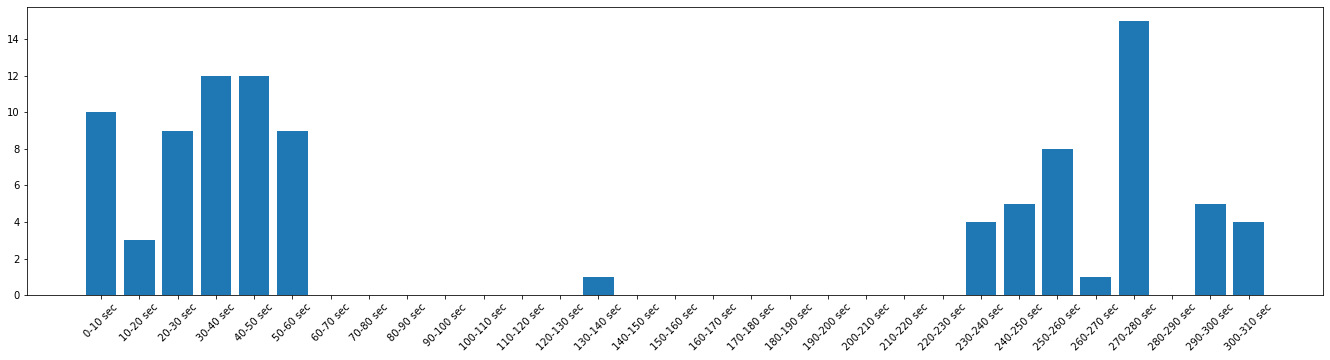

In [56]:
import matplotlib.pyplot as plt

cluster_time = 10
ten_sec_cluster = cluster_by_seconds(face_time, cluster_time)

fig = plt.figure()
ax = fig.add_axes([0, 0, 3, 1])
time_intervals = []
for i in range(len(ten_sec_cluster)):
    time_intervals.append(
        f"{i * cluster_time}-{i * cluster_time + cluster_time} sec")
ax.bar(time_intervals, ten_sec_cluster)
ax.tick_params(axis='x', labelrotation=45)

plt.show()
